# Load and Plot
## Load Libraries

In [1]:
# Base libraries
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tqdm import tqdm
from tqdm import tnrange
from scipy.special import erf
import pickle
import itertools

# Personal libraries
import henon_map as hm

from parameters import *

epsilon = epsilons[0]
cmap = matplotlib.cm.get_cmap('plasma')

# Matplotlib Settings
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import matplotlib.ticker as ticker
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['savefig.dpi'] = 300

## Load Data
### Load Baseline

In [2]:
# with open("data/raw_data_b.pkl", 'rb') as f:
#     data_b = pickle.load(f)
    
with open("data/DA_b.pkl", 'rb') as f:
    DA_b = pickle.load(f)
    
with open("data/error_b.pkl", 'rb') as f:
    error_b = pickle.load(f)

with open("data/DA_b_mc.pkl", 'rb') as f:
    DA_b_mc = pickle.load(f)
    
with open("data/error_b_mc.pkl", 'rb') as f:
    error_b_mc = pickle.load(f)

### Load Standard Integral

In [3]:
with open("data/DA_1.pkl", 'rb') as f:
    DA_1 = pickle.load(f)
    
with open("data/error_1.pkl", 'rb') as f:
    error_1 = pickle.load(f)

### Load Radial Average

In [4]:
with open("data/DA_2.pkl", 'rb') as f:
    DA_2 = pickle.load(f)
    
with open("data/error_2.pkl", 'rb') as f:
    error_2 = pickle.load(f)
    
# with open("data/count_matrix_2.pkl", 'rb') as f:
#     count_matrix_2 = pickle.load(f)
    
# with open("data/avg_matrix_2.pkl", 'rb') as f:
#     average_matrix_2 = pickle.load(f)
    
#with open(savepath + "data/matrix_eps_{}_sm_{}_turn_{}.pkl".format(int(epsilons[0]), samples, turn_sampling[0]), 'rb') as f:
#    count_total, average_total = pickle.load(f)

### Load Monte Carlo

In [4]:
with open("data/DA_3.pkl", 'rb') as f:
    DA_3 = pickle.load(f)
    
with open("data/error_3.pkl", 'rb') as f:
    error_3 = pickle.load(f)

### Load Stratified Monte Carlo

In [5]:
with open("data/DA_4.pkl", 'rb') as f:
    DA_4 = pickle.load(f)

with open("data/error_4.pkl", 'rb') as f:
    error_4 = pickle.load(f)

### Load 2D Scanning

In [20]:
with open("data/DA_5.pkl", 'rb') as f:
    DA_5 = pickle.load(f)
    
with open("data/error_5.pkl", 'rb') as f:
    error_5 = pickle.load(f)

## Plot Stuff

### Angles heatmap (Angular Average) (NEW VERSION)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')

import matplotlib.ticker as ticker

alpha_preliminary_values = np.linspace(-1.0, 1.0, samples)
alpha_values = np.arccos(alpha_preliminary_values) / 2

for i in tqdm(range(len(count_total))): # fineness index
    # Bit of preprocessing
    average_total[i][average_total[i] == 0] = np.nan
    
    # Whole plotting
    
    fig, axs = plt.subplots(1,2, figsize=(12,6))

    coso = axs[0].imshow(np.nanmean(average_total[i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))
    axs[0].set_title("Average radius measured \n $\\varepsilon={}$, $N$ iters $={}$".format(epsilons[0], turn_sampling[0]))
    axs[0].set_xlabel("$\\theta_1$")
    axs[0].set_ylabel("$\\theta_2$")
    fig.colorbar(coso, ax=axs[0])

    axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[0].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

    coso = axs[1].imshow(np.nansum(count_total[i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2), vmin=0)
    axs[1].set_title("Number of samples \n $\\varepsilon={}$, $N$ iters $={}$".format(epsilons[0], turn_sampling[0]))
    axs[1].set_xlabel("$\\theta_1$")
    axs[1].set_ylabel("$\\theta_2$")
    fig.colorbar(coso, ax=axs[1])

    axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
    axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[1].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

    plt.tight_layout()
    # print(key)
    plt.savefig("img/cm_eps_" + str(int(epsilons[0])) + "_t_" + str(turn_sampling[0]) + ".jpg", dpi=300)
    plt.close()
    
    # Singular plotting
    
    for j in tqdm(range(len(count_total[0]))):
        fig, axs = plt.subplots(1,2, figsize=(12,6))
        coso = axs[0].imshow(average_total[i][j], origin="lower", extent=(0, np.pi*2, 0, np.pi*2))
        axs[0].set_title("Average radius measured \n $\\varepsilon={}$, $\\alpha = {}$, $N$ iters $={}$".format(epsilons[0], alpha_values[j], turn_sampling[0]))
        axs[0].set_xlabel("$\\theta_1$")
        axs[0].set_ylabel("$\\theta_2$")
        fig.colorbar(coso, ax=axs[0])

        axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
        axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[0].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

        coso = axs[1].imshow(count_total[i][j], origin="lower", extent=(0, np.pi*2, 0, np.pi*2), vmin=0)
        axs[1].set_title("Number of samples\n$\\varepsilon={}$, $\\alpha = {}$, $N$ iters $={}$".format(epsilons[0], alpha_values[j], turn_sampling[0]))
        axs[1].set_xlabel("$\\theta_1$")
        axs[1].set_ylabel("$\\theta_2$")
        fig.colorbar(coso, ax=axs[1])

        axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
        axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[1].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

        plt.tight_layout()
        # print(key)
        plt.savefig("img/cm_eps_" + str(int(epsilons[0])) + "_t_" + str(turn_sampling[0]) + "_alpha_" + str(alpha_values[j]) + ".jpg", dpi=300)
        plt.close()





  0%|          | 0/8 [00:00<?, ?it/s]




  0%|          | 0/2049 [00:00<?, ?it/s]




  0%|          | 1/2049 [00:00<17:16,  1.98it/s]




  0%|          | 2/2049 [00:01<19:58,  1.71it/s]




  0%|          | 3/2049 [00:01<19:23,  1.76it/s]




  0%|          | 4/2049 [00:02<18:52,  1.81it/s]




  0%|          | 5/2049 [00:03<25:42,  1.33it/s]




  0%|          | 6/2049 [00:04<23:22,  1.46it/s]




  0%|          | 7/2049 [00:04<21:53,  1.55it/s]




  0%|          | 8/2049 [00:05<20:40,  1.64it/s]




  0%|          | 9/2049 [00:05<19:44,  1.72it/s]




  0%|          | 10/2049 [00:06<19:05,  1.78it/s]




  1%|          | 11/2049 [00:06<18:27,  1.84it/s]




  1%|          | 12/2049 [00:07<18:22,  1.85it/s]




  1%|          | 13/2049 [00:07<18:08,  1.87it/s]




  1%|          | 14/2049 [00:08<18:16,  1.86it/s]




  1%|          | 15/2049 [00:08<18:06,  1.87it/s]




  1%|          | 16/2049 [00:09<17:57,  1.89it/s]




  1%|          | 17/2049 [00:09<17:55,  1.89it/s]






In [ ]:
import ffmpeg
import os

name = "movie.mp4"

if os.path.exists(name):
    os.remove(name)
    print("previous movie destroyed!")

(
    ffmpeg
    .input('img/cm_eps*.jpg', pattern_type='glob', framerate=2)
    .output(name)
    .run()
);

### Angles heatmap (Angular Average) (OLD VERSION)

In [13]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')

import matplotlib.ticker as ticker

for key in tqdm(list(sorted(count_matrix_2, key=lambda a : a[2]))):
    if key[0] == epsilon:
        for i in tqdm(range(len(average_matrix_2[key]))):
            fig, axs = plt.subplots(1,2, figsize=(12,6))

            coso = axs[0].imshow(np.nanmean(average_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))
            axs[0].set_title("Average radius measured\n$\\varepsilon={}$, $\\alpha$ samples $= {}$, $N$ iters $={}$".format(key[0], key[1], key[2]))
            axs[0].set_xlabel("$\\theta_1$")
            axs[0].set_ylabel("$\\theta_2$")
            fig.colorbar(coso, ax=axs[0])

            axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
            axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[0].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

            coso = axs[1].imshow(np.nanmean(count_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2), vmin=0)
            axs[1].set_title("Number of samples\n$\\varepsilon={}$, $\\alpha$ samples $= {}$, $N$ iters $={}$".format(key[0], key[1], key[2]))
            axs[1].set_xlabel("$\\theta_1$")
            axs[1].set_ylabel("$\\theta_2$")
            fig.colorbar(coso, ax=axs[1])

            axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
            axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[1].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

            plt.tight_layout()
            # print(key)
            plt.savefig("img/cm_eps_" + str(int(key[0])) + "_N_" + str(key[1]) + "_t_" + str(key[2]) + "_el_" + str(i) + ".jpg", dpi=300)
            plt.close()

100%|██████████| 10/10 [00:55<00:00,  5.55s/it]


In [14]:
import ffmpeg
import os

name = "movie.mp4"

if os.path.exists(name):
    os.remove(name)
    print("previous movie destroyed!")

(
    ffmpeg
    .input('img/cm_eps*.jpg', pattern_type='glob', framerate=2)
    .output(name)
    .run()
);

previous movie destroyed!


### Baseline

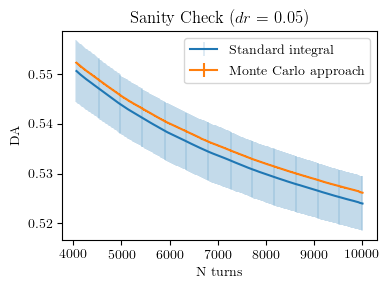

In [33]:
plt.figure(figsize=(4, 3))

plt.errorbar(turn_sampling[:-200], DA_b[epsilon][:-200], yerr=error_b[epsilon][:-200], elinewidth=0.2, label="Standard integral")
plt.errorbar(turn_sampling[:-200], DA_b_mc[epsilon][:-200], yerr=error_b_mc[epsilon][:-200], label="Monte Carlo approach")

plt.xlabel("N turns")
plt.ylabel("DA")

plt.title("Sanity Check $(dr = {})$".format(d_r))

plt.legend()
plt.tight_layout()

plt.savefig("img/sanity_check.png", dpi=300)

### Standard Integral

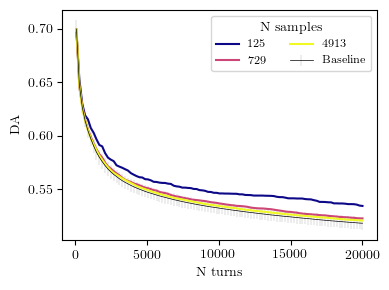

In [5]:
plt.figure(figsize=(4, 3))
plt.errorbar(turn_sampling, DA_b[epsilon], yerr=error_b[epsilon], c="black", linewidth=0.5, elinewidth=0.1, label="Baseline")
elements = np.linspace(0,1,len(DA_1))
for i, label in enumerate(sorted(DA_1, key=lambda a: a[1])):
    if label[0] == epsilon:
        plt.plot(turn_sampling, DA_1[label], c=cmap(elements[i]), label=str(label[1]))
#plt.title("Comparison with Standard Integral")
plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/standard_integral.png", dpi=300)
plt.savefig("img/standard_integral.pgf")

# plt.close()

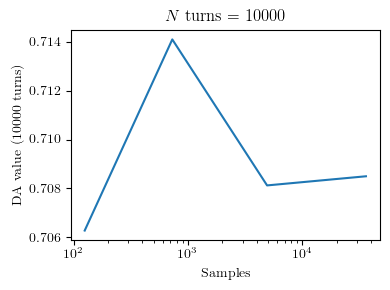

In [42]:
plt.figure(figsize=(4, 3))

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_1, key=lambda a: a[1])):
    data.append(DA_1[label][-1])
    error.append(error_1[label][-1])
    labels.append(label[1])
    
plt.plot(labels, data)

plt.title("$N$ turns $={}$".format(max_turns))
plt.xscale("log")
plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/standard_integral_single.png", dpi=300)
plt.savefig("img/standard_integral_single.pgf")

#plt.close()

### Radial Average

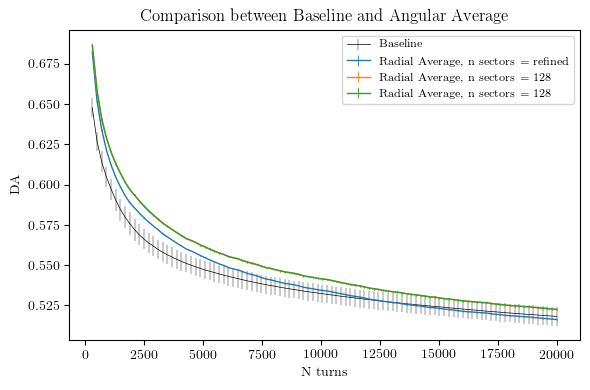

In [19]:
# Radial Average
skipper = -1

plt.figure()
plt.errorbar(turn_sampling[:skipper], DA_b[epsilon][:skipper], yerr=error_b[epsilon][:skipper], c="black", linewidth=0.5, elinewidth=0.3, label="Baseline")

labels = sorted(filter(lambda x: x[0] == epsilon and x[3] == 'mc' and x[1] == samples and (x[2] == "refined" or x[2] != 1), DA_2), key=lambda a: a[1])

for label in [labels[0], labels[-1], labels[8]]:
    plt.errorbar(turn_sampling[:skipper], DA_2[label][:skipper], yerr=error_2[label][:skipper], label="Radial Average, n sectors = {}".format(label[2]), linewidth=1, elinewidth=0.6)

#plt.title("Comparison with Angular Average")
plt.xlabel("N turns")
plt.ylabel("DA")
plt.legend(fontsize="small")
plt.title("Comparison between Baseline and Angular Average")
plt.tight_layout()

plt.savefig("img/radial_average.png", dpi=600)
plt.savefig("img/radial_average.pgf")

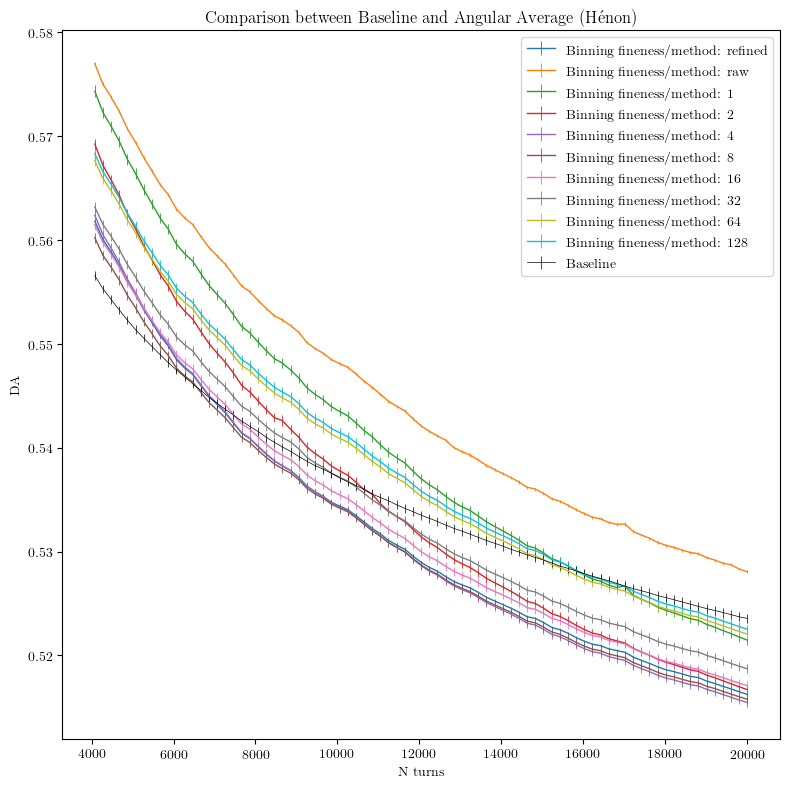

In [31]:
# Radial Average
skipper = -20
plt.figure(figsize=(8,8))

labels = sorted(filter(lambda x: x[0] == epsilon and x[3] == 'mc' and x[1] == samples, DA_2), key=lambda a: a[1])

for label in labels:
    plt.errorbar(turn_sampling[:skipper], DA_2[label][:skipper], yerr=error_2[label][:skipper], label="Binning fineness/method: " + str(label[2]), linewidth=1, elinewidth=0.6)

plt.errorbar(turn_sampling[:skipper], DA_b_mc[epsilon][:skipper], yerr=error_b_mc[epsilon][:skipper], c="black", linewidth=0.5, label="Baseline")
#plt.plot(turn_sampling[:skipper], DA_2[labels[0]][:skipper], c="blue", linewidth=2.5, label="REFINED")

    
#plt.title("Comparison with Angular Average")
plt.xlabel("N turns")
plt.ylabel("DA")
plt.legend()
plt.title("Comparison between Baseline and Angular Average (Hénon)")
plt.tight_layout()

plt.savefig("img/radial_average.png", dpi=600)
plt.savefig("img/radial_average.jpg", dpi=600)
plt.savefig("img/radial_average.pgf")

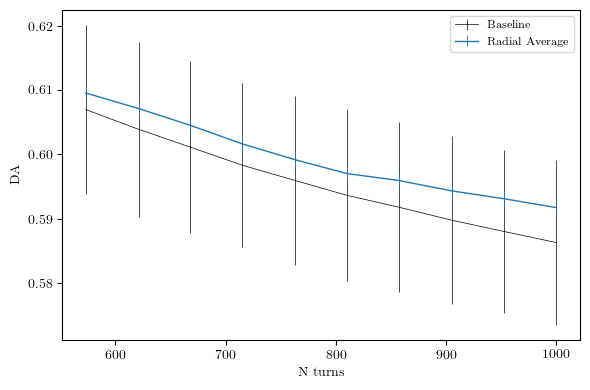

In [12]:
# Radial Average
pos = len(turn_sampling) // 2
plt.figure()
plt.errorbar(turn_sampling[:pos], DA_b[epsilon][:pos], yerr=error_b[epsilon][:pos], c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")

label = sorted(filter(lambda x: x[0] == epsilon, DA_2), key=lambda a: a[1])[-1]

plt.errorbar(turn_sampling[:pos], DA_2[label][:pos], yerr=error_2[label][:pos], label="Radial Average", linewidth=1, elinewidth=0.6)

#plt.title("Comparison with Angular Average")
plt.xlabel("N turns")
plt.ylabel("DA")
plt.legend(fontsize="small")
plt.tight_layout()

plt.savefig("img/radial_average_end.png", dpi=300)
plt.savefig("img/radial_average_end.pgf")

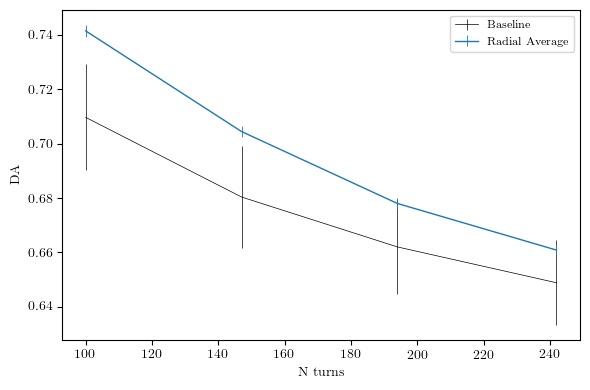

In [13]:
# Radial Average
pos = len(turn_sampling) // 5
plt.figure()
plt.errorbar(turn_sampling[-pos:], DA_b[epsilon][-pos:], yerr=error_b[epsilon][-pos:], c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")

label = sorted(filter(lambda x: x[0] == epsilon, DA_2), key=lambda a: a[1](16.0, 2049, 1, 'int'))[-1]

plt.errorbar(turn_sampling[-pos:], DA_2[label][-pos:], yerr=error_2[label][-pos:], label="Radial Average", linewidth=1, elinewidth=0.6)

#plt.title("Comparison with Angular Average")
plt.xlabel("N turns")
plt.ylabel("DA")
plt.legend(fontsize="small")
plt.tight_layout()

plt.savefig("img/radial_average_begin.png", dpi=300)
plt.savefig("img/radial_average_begin.pgf")

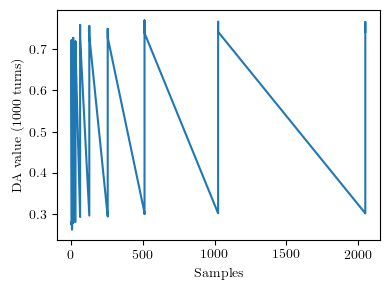

In [14]:
plt.figure(figsize=(4, 3))

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_2, key=lambda a: a[1])):
    data.append(DA_2[label][-1])
    error.append(error_2[label][-1])
    labels.append(label[1])
    
plt.plot(labels, data)

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/radial_average_single.png", dpi=300)
plt.savefig("img/radial_average_single.pgf")

### Monte Carlo

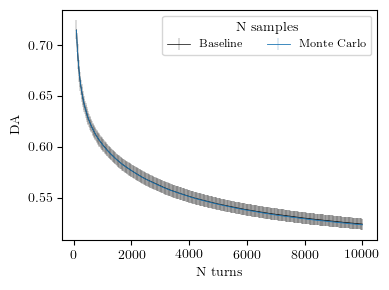

In [13]:
plt.figure(figsize=(4, 3))
plt.errorbar(turn_sampling, DA_b[epsilon], yerr=error_b[epsilon], c="black", linewidth=0.5, elinewidth=0.2, label="Baseline")

label = sorted(filter(lambda x: x[0] == epsilon, DA_3), key=lambda a: a[1])[-1]
plt.errorbar(turn_sampling, DA_3[label], yerr=error_3[label], label="Monte Carlo", linewidth=0.6, elinewidth=0.2)

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/monte_carlo.png", dpi=300)
plt.savefig("img/monte_carlo.pgf")

### Stratified Monte Carlo

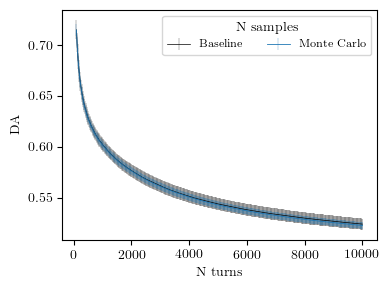

In [15]:
plt.figure(figsize=(4, 3))
plt.errorbar(turn_sampling, DA_b[epsilon], yerr=error_b[epsilon], c="black", linewidth=0.5, elinewidth=0.2, label="Baseline")

label = sorted(filter(lambda x: x[0] == epsilon, DA_4), key=lambda a: a[1])[-1]
plt.errorbar(turn_sampling, DA_4[label], yerr=error_4[label], label="Monte Carlo", linewidth=0.6, elinewidth=0.2)

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/stratified_monte_carlo.png", dpi=300)
plt.savefig("img/stratified_monte_carlo.pgf")

### Monte Carlo vs. Stratified

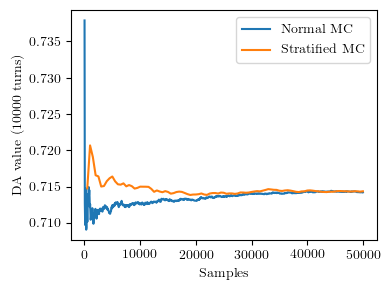

In [18]:
plt.figure(figsize=(4, 3))

data = []
error = []
labels = []

data_s = []
error_s = []
labels_s = []

for i, label in enumerate(sorted(DA_3, key=lambda a: a[1])):
    data.append(DA_3[label][-1])
    error.append(error_3[label][-1])
    labels.append(label[1])

for i, label in enumerate(sorted(DA_4, key=lambda a: a[1])):
    data_s.append(DA_4[label][-1])
    error_s.append(error_4[label][-1])
    labels_s.append(label[1])
    
plt.plot(labels, data, label="Normal MC")
plt.plot(labels_s, data_s, label="Stratified MC")

plt.legend()
plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/monte_carlo_single.png", dpi=300)
plt.savefig("img/monte_carlo_single.pgf")

### 2D Sampling

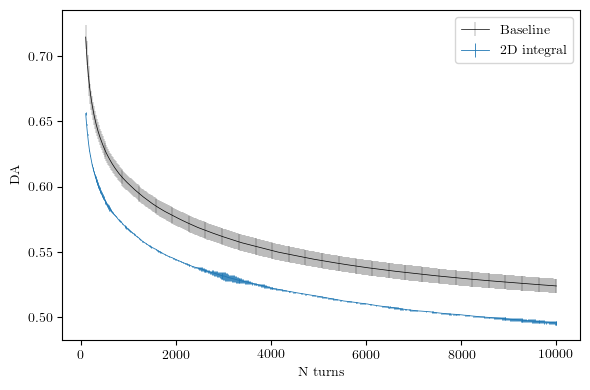

In [25]:
plt.figure()
plt.errorbar(turn_sampling, DA_b[epsilon], yerr=error_b[epsilon], c="black", linewidth=0.5, elinewidth=0.2, label="Baseline")
elements = np.linspace(0,1,len(DA_5))

label = sorted(filter(lambda x: x[0] == epsilon, DA_5), key=lambda a: a[1][0])[-1]
plt.errorbar(turn_sampling, DA_5[label], yerr=error_5[label], label="2D integral", linewidth=0.6, elinewidth=0.6)

#plt.title("Comparison with 2D integral")
plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend()
plt.tight_layout()

plt.savefig("img/2d_integral.png", dpi=300)
plt.savefig("img/2d_integral.pgf")

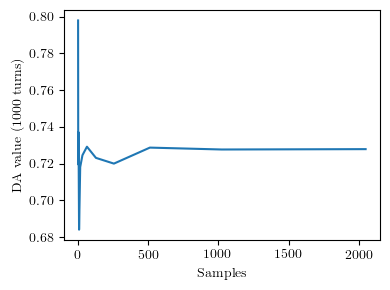

In [23]:
plt.figure(figsize=(4, 3))

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_5, key=lambda a: a[1])):
    data.append(DA_5[label][-1])
    error.append(error_5[label][-1])
    labels.append(label[1][0])
    
plt.plot(labels, data)

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/2d_single.png", dpi=300)
plt.savefig("img/2d_single.pgf")

### Maxi Contest

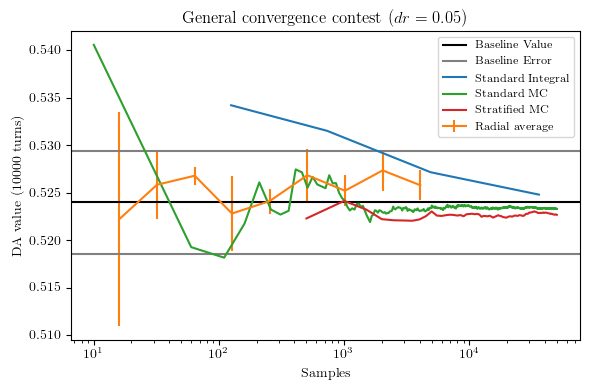

In [38]:
plt.figure()

plt.axhline(DA_b[epsilon][0], c='black', label="Baseline Value")
plt.axhline(DA_b[epsilon][0] + error_b[epsilon][0], c='grey', label="Baseline Error")
plt.axhline(DA_b[epsilon][0] - error_b[epsilon][0], c='grey')

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_1, key=lambda a: a[1])):
    data.append(DA_1[label][0])
    error.append(error_1[label][0])
    labels.append(label[1])

plt.plot(labels, data, label="Standard Integral")
    
data = []
error = []
labels = []


for label in sorted(filter(lambda x: x[0] == epsilon and x[3] == 'int' and x[2] == 32, DA_2.keys()), key=lambda a: a[1]):
    data.append(DA_2[label][0])
    error.append(error_2[label][0])
    labels.append(label[1])

plt.errorbar(labels[2:], data[2:], yerr=error[2:], label="Radial average")
    
data = []
error = []
labels = []

data_s = []
error_s = []
labels_s = []

for i, label in enumerate(sorted(DA_3, key=lambda a: a[1])):
    data.append(DA_3[label][0])
    error.append(error_3[label][0])
    labels.append(label[1])

for i, label in enumerate(sorted(DA_4, key=lambda a: a[1])):
    data_s.append(DA_4[label][0])
    error_s.append(error_4[label][0])
    labels_s.append(label[1])
    
plt.plot(labels, data, label="Standard MC")
plt.plot(labels_s, data_s, label="Stratified MC")

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_5, key=lambda a: a[1])):
    data.append(DA_5[label][0])
    error.append(error_5[label][0])
    labels.append(label[1][0])
    
#plt.plot(labels, data, label="2D Sampling")

plt.legend(fontsize="small")

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.title("General convergence contest $(dr=0.05)$")
plt.tight_layout()

plt.xscale("log")

plt.savefig("img/mashup_single.png", dpi=600)
plt.savefig("img/mashup_single.pgf")